# Sentiment Classification And Opinion Mining On Airline Reviews

Internship Title : April 22nd ML and DL Team 11
   
   
Category: Artificial Intelligence

Skills Required:
Python Web Frame Works,Data Preprocessing Techniques,NLP,Flask Integration

Project Description:

Opinion Mining (OM) or Sentiment Analysis (SA) can be defined as the task of detecting, extracting and classifying opinions on something. It is a type of the processing of the natural language (NLP) to track the public mood to a certain law, policy, or marketing, etc. It involves a way that development for the collection and examination of comments and opinions about legislation, laws, policies, etc., which are posted on the social media. The process of information extraction is very important because it is a very useful technique but also a challenging task. That mean, to extract sentiment from an object in the web-wide, need to automate opinion-mining systems to do it. The existing techniques for sentiment analysis include machine learning (supervised and unsupervised), and lexical-based approaches. Hence, the main aim of this project presents a survey of sentiment analysis (SA) and opinion mining (OM) approaches, various techniques used that related in this field. 

Solution:

These days, sentiment analysis is gaining importance in the research study of text mining and natural language processing (NLP). There has been a rise in accessibility of online applications and a surge in social platforms for opinion sharing, online review websites, and personal blogs, which have captured the attention of stakeholders such as customers, organizations, and governments to analyze and explore these opinions. Therefore, the major role of sentiment classification is to analyze an online document such as a blog, comment, review and new items as a comprehensive sentiment and categories it as positive, negative, or neutral.

# Importing Libraries


In [112]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Importing DataSet

In [113]:
dataset = pd.read_csv('Tweets.csv')
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [114]:
dataset.corr()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


# Importing Seaborn Library

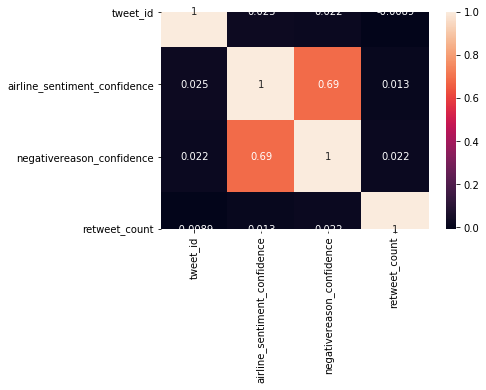

In [115]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [116]:
#to know if there is any missing data

dataset.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

In [117]:
#dropping of columns

dataset =dataset.drop(columns=['tweet_id','airline_sentiment_gold','negativereason_gold','tweet_coord'], axis=1)
dataset

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN
14637,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


# Splitting Dataset into Independent variable and Dependent variable

In [118]:
x= dataset.iloc[:,1:].values
x  

array([[1.0, nan, nan, ..., '2015-02-24 11:35:52 -0800', nan,
        'Eastern Time (US & Canada)'],
       [0.3486, nan, 0.0, ..., '2015-02-24 11:15:59 -0800', nan,
        'Pacific Time (US & Canada)'],
       [0.6837, nan, nan, ..., '2015-02-24 11:15:48 -0800', 'Lets Play',
        'Central Time (US & Canada)'],
       ...,
       [1.0, nan, nan, ..., '2015-02-22 11:59:15 -0800', 'Nigeria,lagos',
        nan],
       [1.0, 'Customer Service Issue', 0.6659, ...,
        '2015-02-22 11:59:02 -0800', 'New Jersey',
        'Eastern Time (US & Canada)'],
       [0.6771, nan, 0.0, ..., '2015-02-22 11:58:51 -0800', 'dallas, TX',
        nan]], dtype=object)

In [119]:
y=dataset.iloc[:,0].values
y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [120]:
x.shape

(14640, 10)

In [121]:
y.shape

(14640,)

# Data Visualization

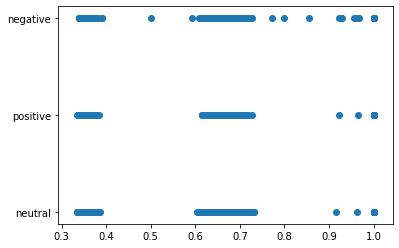

In [122]:
#Using ScatterPlots

plt.scatter(x[:,0],y)

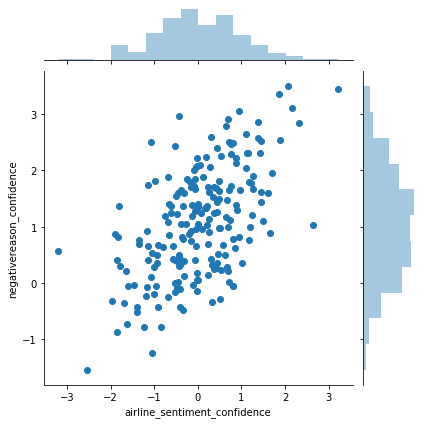

In [123]:
#ScatterPlots 

sns.jointplot(x="airline_sentiment_confidence", y="negativereason_confidence", data=df);

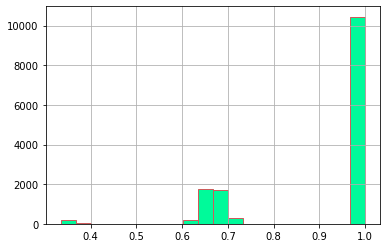

In [124]:
#Using Histograms

dataset['airline_sentiment_confidence'].hist(bins=20,color='mediumspringgreen',edgecolor='indianred')
plt.show()

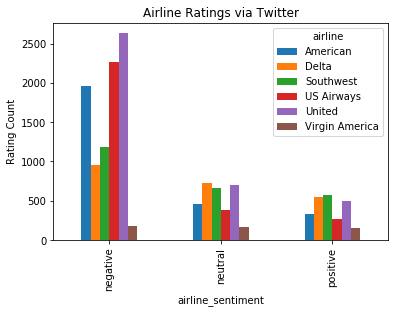

In [125]:
#Rating Based On Airline_sentiment

b = dataset.groupby(['airline','airline_sentiment']).count().iloc[:,0].unstack(0).plot(kind = 'bar', 
                                                                                  title = 'Airline Ratings via Twitter')
b.set_xlabel('airline_sentiment')
b.set_ylabel('Rating Count')
plt.show()

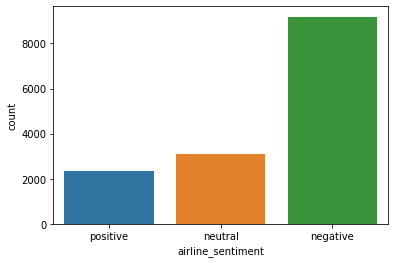

In [126]:
#Using CountPlot

sns.countplot(x='airline_sentiment',data=dataset,order=['positive','neutral','negative'])
plt.show()

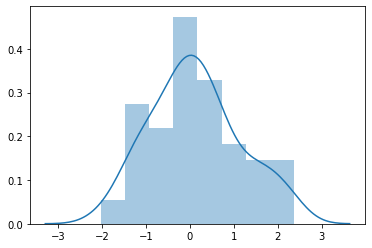

In [127]:
#Plotting Univariate Distributions

v = np.random.normal(size=100)
sns.distplot(v);

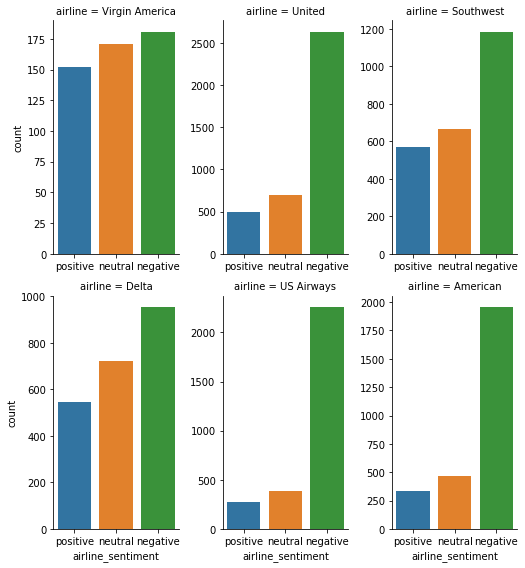

In [128]:
#Using FactorPlot

sns.factorplot(x = 'airline_sentiment',data=dataset, order = ['positive','neutral','negative'],
               kind = 'count',col_wrap=3,col='airline',
               size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

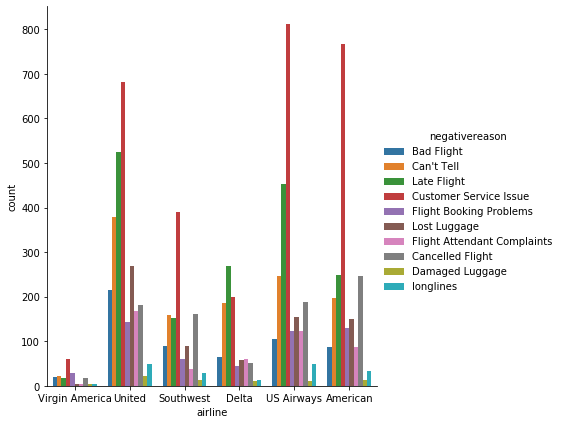

In [129]:
sns.factorplot(x = 'airline',data = dataset,kind = 'count',hue='negativereason',size=6,aspect=.9)
plt.show()

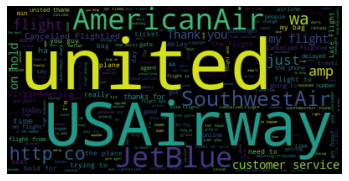

In [130]:
#Word Analysis

from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
all_words = ' '.join([text for text in dataset['text']])
wordcloud = WordCloud(background_color = 'black',stopwords = ENGLISH_STOP_WORDS).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [131]:
#Plotting Bivariate Distributions

mean, cov = [0, 1], [(1, .5), (.5, 1)]
dataset = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(dataset, columns=["airline_sentiment_confidence", "negativereason_confidence"])

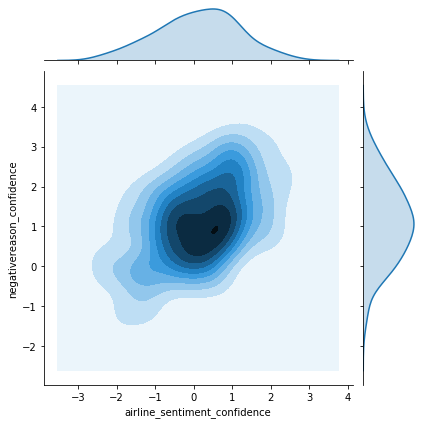

In [132]:
#kernel Density Estimation

sns.jointplot(x="airline_sentiment_confidence", y="negativereason_confidence", data=df, kind="kde");

In [146]:
dataset.airline_sentiment

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [147]:
r=dataset.airline_sentiment.value_counts()
r

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x16c8b38f8c8>,
 [Text(-0.46587324595946716, 1.1058761769290402, 'negative'),
  Text(-0.13194990000624415, -1.2128434457457165, 'neutral'),
  Text(1.206352618660121, -0.6701592045565506, 'positive')],
 [Text(-0.2717593934763558, 0.6450944365419401, '62.69%'),
  Text(-0.0778720721348326, -0.7157764597843571, '21.17%'),
  Text(0.7692683365368889, -0.4273478985578003, '16.14%')])

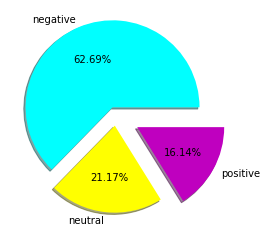

In [148]:
#Using PieChart

labels=['negative','neutral','positive']
size=[9178,3099,2363]
colors = ["cyan", "yellow", "m"]
explode = (0.1,0.12,0.28)
plt.pie(size,labels=labels,explode=explode,colors=colors,autopct='%1.2f%%',shadow=True)

# Importing Dependent Libraries

In [149]:
import pandas as pd
import numpy as np
import re

In [164]:
#importing dataset
dataset= pd.read_csv('Tweets.csv')
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [165]:
dict = {'negative':-1,
         'positive':1,
          'neutral':0}
dataset['airline_sentiment'].replace(dict,inplace=True)
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,-1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,-1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [166]:
#taking care of missing data

dataset.drop(['airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name'],axis=1,inplace=True)
dataset.drop(['tweet_id','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)


In [167]:
for i in range(0,14640):
    if(dataset['text'][i]==[]):
        dataset.drop(i,inplace=True)

In [168]:
import re
import nltk

In [169]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [171]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

In [172]:
#Tokenisation,Parts of speech,Lexical analysis,Lemmatization
dataset['text'] = np.vectorize(remove_pattern)(dataset['text'], "@[\w]*") #removes word which starts with @...
dataset['text'] = dataset['text'].str.replace("[^a-zA-Z#]", " ") #[^a-zA-Z#]” means anything except alphabets and ‘#’.
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [173]:
ps=PorterStemmer()
data=[] 
for i in range(0,14640):
    review=dataset['text'][i]
    review=re.sub('[^a-zA-Z]',' ',review)
    review=review.lower()
    review=review.split()
    
    #apply stemming concept
    
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
    
    # we use same line as there may be word left which are stopword
    
    review=' '.join(review) 
    data.append(review) 

In [174]:
#CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer #for tokeniser i.e,binary
cv = CountVectorizer(max_features = 800)
x = cv.fit_transform(data).toarray()
y = dataset.iloc[:,0].values

In [175]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

# Splitting data into Train and Test

In [176]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# ANN Model

# Importing Model building libraries

In [177]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [178]:
x_train.shape

(11712, 800)

# Initializing the ANN Model

In [179]:
model = Sequential()

# Adding Input layer,Hidden layer and Output layer

In [180]:
model.add(Dense(input_dim=800, init="random_uniform", activation='sigmoid',output_dim=300))

R:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=800, activation="sigmoid", units=300, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [181]:
model.add(Dense(output_dim=100, init="random_uniform", activation='sigmoid'))

R:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=100, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [182]:
model.add(Dense(output_dim=3, init="random_uniform", activation='softmax'))

R:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


# Compiling The Model

Here we use optimizer as "adam",loss function as sparse_categorical_crossentropy

In [183]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and Test the Model

In [184]:
model.fit(x_train,y_train, epochs=70, batch_size=10)

Epoch 1/70
11712/11712 [==============================] - 9s 726us/step - loss: 0.7514 - acc: 0.6814
Epoch 2/70
11712/11712 [==============================] - 7s 610us/step - loss: 0.5622 - acc: 0.7734
Epoch 3/70
11712/11712 [==============================] - 7s 590us/step - loss: 0.5131 - acc: 0.7932
Epoch 4/70
11712/11712 [==============================] - 7s 567us/step - loss: 0.4951 - acc: 0.8046
Epoch 5/70
11712/11712 [==============================] - 7s 593us/step - loss: 0.4844 - acc: 0.8037
Epoch 6/70
11712/11712 [==============================] - 8s 648us/step - loss: 0.4786 - acc: 0.8087
Epoch 7/70
11712/11712 [==============================] - 7s 597us/step - loss: 0.4757 - acc: 0.8076
Epoch 8/70
11712/11712 [==============================] - 7s 604us/step - loss: 0.4689 - acc: 0.8120
Epoch 9/70
11712/11712 [==============================] - 6s 555us/step - loss: 0.4673 - acc: 0.8124
Epoch 10/70
11712/11712 [==============================] - 7s 599us/step - loss: 0.4645 - a

# Predicting the model

In [186]:
y_pred=model.predict(x_test)
y_pred

array([[1.0000000e+00, 6.1698790e-15, 4.0553627e-14],
       [1.0000000e+00, 6.9732571e-13, 5.4002136e-17],
       [9.9981266e-01, 1.8739533e-04, 6.9019424e-10],
       ...,
       [1.0000000e+00, 9.1187246e-17, 4.1965012e-20],
       [9.9996340e-01, 7.4785078e-07, 3.5850364e-05],
       [1.0000000e+00, 5.9109489e-14, 1.7499814e-14]], dtype=float32)

In [187]:
y_pred=(y_pred>0.5)
y_pred

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [188]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
score = model.evaluate(x_test, y_test)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

2928/2928 [==============================] - 0s 48us/step
Test Score: 2.141244452182061
Test Accuracy: 0.7226775956284153


In [190]:
v=model.predict(cv.transform(["Customer Service Issue"]))
v

array([[0.15975869, 0.6586158 , 0.18162555]], dtype=float32)

In [191]:
r=model.predict(cv.transform(["bad flight"]))
r

array([[0.26764634, 0.640422  , 0.09193178]], dtype=float32)

In [192]:
r=model.predict(cv.transform(["Can't Tell"]))
r

array([[8.3422512e-01, 1.6577421e-01, 6.5257638e-07]], dtype=float32)

# Saving the Model

In [193]:
model.save("airline_predictions.h5")